# <font style='font-size:4rem'> Soft-Sensor Development</font>
<hr>

## Table of Content:
<br>
<font style='font-size:1.5em'>
<ul>
    <li><a href='#intro'>A. Introduction</a>
    <li><a href='#jptnb'>B. How to Utilize Jupyter Notebook</a>
    <li><a href='#overallprocess'>C. Overall Development Process of Soft-Sensor</a>
    <li><a href='#acquiredata'>D. Acquiring Data</a>
    <li><a href='#datapreprocessing'>E. Data Preprocessing</a>        
    <ul>
        <li style='list-style-type: circle'><a href='#integration'>Data Integration</a>
        <li style='list-style-type: circle'><a href='#cleaning'>Data Cleaning</a>
        <li style='list-style-type: circle'><a href='#transformation'>Data Transformation</a>
        <li style='list-style-type: circle'><a href='#reduction'>Data Reduction</a>
    </ul>
    <li><a href='#featureengineering'>F. Feature Engineering</a>       
    <li><a href='#eda'>G. Exploratory Data Analysis</a>
    <li><a href='#modelconcepts'>H. Modeling Concepts</a>
    <li><a href='#outliersdetection'>I. Outliers Detection</a>
    <li><a href='#modeling'>J. Modeling</a>    
    <li><a href='#sampleselection'>K. Sample Selection</a>
    <li><a href='#interpretmodel'>L. Interpret Models</a>
    <li><a href='#refine'>M. Refine Model</a>   
    <li><a href='#modularize'>N. Modularize Your Model</a>   
    <li><a href='#iterativerefine'>O. Iteratively Refine Model</a>
    <li><a href='#finalize'>P. Finalize Your Model</a>   
</ul>
</font>
<hr>


## A.Introduction <span id='intro'></span>

### 1. What is soft-sensor and why we need it
Soft-sensors are online analyzers used to monitor certain critical variables in the process without having to take samples and perform high cost measurement frequently.   

### 2. How do we do that?
We build soft sensor by modeling process hostorical log data with the limited amount of measured samples and try to best correlate process variable with target variable.

### 3. What is this noteook for?
In this notebook, we will use a pseudo process dataset and applying python programming on the dataset. In order to cover the most skill set required for modeling soft sensor, we will also talk about data preprocessing, visualization and some machine learning concepts.  
<hr>

In [1]:
#Run this cell to import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

<hr>

## B.How to Utilize Jupyter Notebook <span id='jptnb'></span> 

### 1. User Interface
You can find most frequently used functions within toolbar on the top left corner. The python logo on the top right indicates that this notebook is built with python syntax.
<img src='images/toolbar.JPG' width='850'>

### 2. Code Cells
One advantage of Jupyter Notebook is that you can analyze and run the code cell by cell. Every cell is independent to some extent, you can run cells according to customized sequence or run all at once if you want. Of course, variables are shared within the notebook environment.

- If you wish to run a single cell, click in that cell and presss **shift+enter**

### 3. Markdown Cells
Another advanage of Jupyter Notebook is that you can insert markdown cell between code cells. Markdown is a markup language that is frequently used in documenting. You can illustrate anything you want others to know through the markdown cell like I am doing now. 

### 4. Sequence of Execution
Please refer to picture below. The number in front of each cell indicates the sequence of execution. You do not have to run cells one by one from top to down. You can run in any order you want, just to make sure it could.
<img src='images/py_seq.JPG' width='550'>

### 5. Errors
If an error occurs during execution of cells, error messages will show up, just like picture below, to tell you where the error occurs and why it occurs. Try to fix the bug and re-run it!
<img src='images/py_error.JPG' width='850'>

### 6. Check Files
You can click on the Jupyter logo on the top left or "Open link in new tab" to visit the file system of Jupyter.

<img src='images/jupyterfile.JPG' width='300'>


In [2]:
#Try anything yourself



<hr>

## C.Overall Development Process for Soft-Sensor<span id='overallprocess'></span> 

<img src='images/overall_process.JPG'>

- **Acquire Data:**<br>
After receiving original data from client or internal department is the start of the whole process. Because this is the original data, it could be messy and not well-structured. That's why we need to do the following preprocessing before going directly into modeling.


- **Data Preprocessing:**<br>
In order to make our raw data usable, preprocessing is a essential step to achieve the goal. Typically, preprocessing includes <font style='color:red'>***data integration, data cleaning, data transformation and data reduction*** </font>(You may hear different versions but that's fine).


- **Feature Engineering:**<br>
Feature engineering is a very critical part in data modeling for it brings extra information from original data. The spirit of feature engineering is to create new variable from original data or transform original data in certain way that better describes the variable. For instance, product to feed ratio and pressure compensation temperature are two examples that we already applied in our previous project.


- **Modeling:**<br>
Here we will use linear models for the soft-sensor development. Three kinds of models will be introduced while we will focus mostly on partial-least-square regression (PLSR) because of some explicit advantages to apply it in process industry.


- **Testing and Going Online:**<br>
After models are trained, it's time to test their ability to deal with fresh, unseen data. If the result is accepable, we could start implement the model to our system either by directly coding into DCS or indirectly by OPC (or other connetion method) to other software(This is how we do in APC project)



<hr>

## D.Acquiring Data<span id='acquiredata'></span> 

In some other cases, we may require to process data from multiple sources(that is, data itegration). But in process industry, most of the data is called from integrated database, thus, we don't usually need to care about having all data together.

We will start to use our simulated data staring from the next cell. The library that is known for handling data in Python is called <font style='color:red'>**Pandas**</font>. We will use a lot of it in the following notebook.

In order to read a csv file (Of course, you can also try other file type), simply use .read_csv() method as below. For reading other type of file, please refer to <a href = 'https://pandas.pydata.org/docs/reference/io.html'>official document of Pandas.</a>

In [3]:
#Run this cell to load process simulation data 
df = pd.read_csv('Process_Simulation_Data.csv')
df

,TARGET,PV1,PV2,PV3,PV4,PV5,PV6,PV7,PV8,PV9,PV10,PV11,PV12,PV13,PV14,PV15,PV16,PV17
0,254.183022,507.485233,334.455486,384.959015,401.327210,113.231754,92.422926,283.352018,134.655432,133.400118,0.239220,0.104169,0.134894,9.485038,852.458636,214.999106,0.773817,2.688987
1,253.110520,510.417424,336.870118,386.952765,402.980828,113.742014,92.948171,285.421807,135.068047,131.562214,0.246395,0.115924,0.135797,8.665276,847.884467,214.971082,0.743161,2.728376
2,261.690538,508.249048,335.352972,384.185073,388.971936,110.219551,89.221924,272.605498,134.457984,141.931500,0.165533,0.089105,0.146556,17.853563,547.960908,214.724602,0.555486,1.882848
3,261.690538,507.705982,336.717031,385.320523,392.636273,110.943054,90.315046,276.499167,134.818591,141.235256,0.193081,0.110195,0.144846,13.872433,556.364501,215.758082,0.558335,2.038663
4,261.690538,508.249048,336.493517,385.845896,392.947214,111.167169,90.176232,275.432987,135.102582,142.182414,0.182918,0.090624,0.146201,17.312811,552.972865,215.228859,0.552928,2.039024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,244.530502,484.478215,323.684908,373.154837,391.260423,110.142346,89.329355,269.247025,127.712355,116.783680,0.177224,0.156572,0.130301,-0.082427,857.112078,214.972954,1.104370,3.890309
361,252.038018,487.428221,327.505379,377.306376,391.338958,110.018342,89.793251,273.624867,128.100770,123.203878,0.157256,0.175660,0.131961,1.376652,860.037515,214.645271,1.073804,3.736708
362,252.038018,488.157839,327.519255,377.713440,392.142886,110.099907,89.957399,274.634874,128.243175,122.295073,0.166004,0.179802,0.131887,-0.008930,859.901520,214.425692,1.070371,3.647795
363,253.110520,481.353944,323.504516,373.121925,386.573140,108.207811,88.647005,270.703133,126.425785,118.727118,0.196803,0.181592,0.131445,0.237863,854.536016,214.866223,1.170523,3.938775


<hr>

## E.Data Preprocessing<span id='datapreprocessing'></span>

Several concepts involved in data processing include 
- **Data Integration**: Combine data from several sources into one integrated dataset
- **Data Cleaning**: Deal with problematic data such as NAN or missing value
- **Data Transformation**: Convert raw data into new form or structure
- **Data Reduction**: Reduct amount of data for better interpretation

You may hear different version or terminology but it's totally fine.<br>
Below we will discuss about how each works and how can you do it with Python commands


### Data Integration <span id='integration'></span>

In process industry, mostly we have sophiscated and integration data acquisition database. Therefore, we may not need to care too much on this part. However, we will still talk about some basic commands you can use to put dataset together.

Assume we two sub dataset called df1 and df2
<br>
- **pd.concat([df1, df2])**: We can use concat function to combine two dataset either horizontally (set axis = 1) or vertically(set axis = 0)
~~~~
pd.concat([df1, df2], axis = 0, ignore_index = True)
~~~~
<br>

- **df1.append(df2)**: We can use append method to combine two datasets vertically
~~~~
df1.append(df2, ignore_index = True)
~~~~
<br>

- **df1.merge(df2)**: We can use merge method to join two related dataframe together. **On** specifies the column to compare whereas **how** specifies the merge method. You may check the different merge method below. 
~~~~
df1.merge(df3, on = 'x1', how = 'left')
~~~~

<img src='images/merge.JPG' style='height:250px'>
<a href='https://datacomy.com/data_analysis/pandas/merge/'><p style='text-align:center'>Source</p></a>

<font style='color:red'>**For more dataframe operation, you may refer to <a href='https://pandas.pydata.org/pandas-docs/stable/reference/frame.html'>Pandas official document.**</a></font>


In [4]:
#Run this cell to generate our test dataframes

df1 = pd.DataFrame({'x1':[1, 2, 3, 4, 5], 'x2':[2, 4, 6, 8, 10],'x3':[-5,-4,-3,-2,-1], 'y1':[0.1, 0.25, 0.5, 1, 1.25]})
df2 = pd.DataFrame({'x1':[0.5, 1.2, 2.5, 4.1, 5.2], 'x2':[1, 3, 5, 7, 9],'x3':[-4.3, -3.4, -2.5, -2.2, -1.1], 'y1':[0.21, 0.35, 0.63, 1.02, 1.4]})
df3 = pd.DataFrame({'x1':[1, 2, 3, 4, 5], 'x4':[3,6,9,12,15], 'y2':[1, 3, 5, 7, 9]})

In [5]:
#Run this cell to see what would happend after concat
pd.concat([df1,df2], axis = 0, ignore_index = True)

,x1,x2,x3,y1
0,1.0,2,-5.0,0.10
1,2.0,4,-4.0,0.25
2,3.0,6,-3.0,0.50
3,4.0,8,-2.0,1.00
4,5.0,10,-1.0,1.25
5,0.5,1,-4.3,0.21
6,1.2,3,-3.4,0.35
7,2.5,5,-2.5,0.63
8,4.1,7,-2.2,1.02
9,5.2,9,-1.1,1.40


In [6]:
#Run this cell to see what would happend after append
df1.append(df2, ignore_index=True)

,x1,x2,x3,y1
0,1.0,2,-5.0,0.10
1,2.0,4,-4.0,0.25
2,3.0,6,-3.0,0.50
3,4.0,8,-2.0,1.00
4,5.0,10,-1.0,1.25
5,0.5,1,-4.3,0.21
6,1.2,3,-3.4,0.35
7,2.5,5,-2.5,0.63
8,4.1,7,-2.2,1.02
9,5.2,9,-1.1,1.40


In [7]:
#Run this cell to see what would happend after merge
df1.merge(df3, on='x1', how='left')

,x1,x2,x3,y1,x4,y2
0,1,2,-5,0.10,3,1
1,2,4,-4,0.25,6,3
2,3,6,-3,0.50,9,5
3,4,8,-2,1.00,12,7
4,5,10,-1,1.25,15,9


In [8]:
#Try on your own


<hr>

### Data Cleaning<span id='cleaning'></span>

In data cleaning, we have to convert or remove unusable data. Such as missing values, outliers, duplicates or data type mismatch. Here we will introduce some basic command for data cleaning.

#### Deal with missing values

- **df4.dropna(axis=0, how='any', thresh=None)**: Delete rows that contains missing value. You can adjust **how** to 'any' or 'all' or set **thresh** to determine how many missing values required to drop that row.
<br>

- **df4.fillna(value = None, method = None)**: Fill the missing value with certain value by adjusting **value** parameter or you can specify certain method. Please refer to <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna'>here</a> for methods available.

#### Deal with duplicates
- **df4.drop_duplicates(subset = None, keep = 'first')**: You can use drop_duplicates to drop dulicates. Adjust subset for columns determining duplicates and keep for which duplicated rows to keep.

Data type mismatch is totally case by case, so we don't talk about that here. We will talk about outliers in later section.

In [9]:
#Run this cell to generate test dataframe
df4 = pd.DataFrame({'x1':[1, 2, 3, 4, 5, 2], 'x2':[2, 4, 6, 8, None, 4], 'y1':[0.1, 0.25, 0.5, 1, 1.25, 0.25]})

In [10]:
#Run this cell to drop row with missing value
df4.dropna()

,x1,x2,y1
0,1,2.0,0.10
1,2,4.0,0.25
2,3,6.0,0.50
3,4,8.0,1.00
5,2,4.0,0.25


In [11]:
#Run this cell to drop rows with Nan
df4.dropna(0)

,x1,x2,y1
0,1,2.0,0.10
1,2,4.0,0.25
2,3,6.0,0.50
3,4,8.0,1.00
5,2,4.0,0.25


In [12]:
#Run this cell to drop duplicate rows
df4.drop_duplicates()

,x1,x2,y1
0,1,2.0,0.10
1,2,4.0,0.25
2,3,6.0,0.50
3,4,8.0,1.00
4,5,NaN,1.25


In [13]:
#Run this cell to drop Nan rows in our process simulation data
df = df.dropna()


<hr>

### Data Transformation<span id='transformation'></span>

In this part, we will talk about some commonly used data transformation methods.

- **Normalization and Standardization** <br>
<font style='color:red'>**Normalization** </font>rescales data to between 0 to 1 <br>
<font style='color:red'>**Standardization**</font>rescales data to have 0 mean and standard deviation of 1
<img src='images/normalization.JPG'>

You can use column manipulation or scalers in sklearn.preprocessing module(Check <a href='https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing'>here</a>)

- **Convert Datatype** <br>
We can use astype method to convert certain column to another datatype. A popular application of datatype conversion is timestamp conversion. You may check the example in cells below.
~~~~
df['Column'] = df['Column'].astype('type')
~~~~

In [14]:
#In order to normalize or standardize data
#You may choose dataframe manipulation or sklearn 
#This cell performs dataframe manipulation
df5 = pd.DataFrame({'x':[2,5,6,7,3,2,3,1]})
df5['norm'] = (df5['x'] - df5['x'].min())/(df5['x'].max() - df5['x'].min())
df5

,x,norm
0,2,0.166667
1,5,0.666667
2,6,0.833333
3,7,1.000000
4,3,0.333333
5,2,0.166667
6,3,0.333333
7,1,0.000000


In [15]:
#Or you can apply sklearn library
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(df5)
transformer.transform(df5)

array([[0.16666667, 0.16666667],
       [0.66666667, 0.66666667],
       [0.83333333, 0.83333333],
       [1.        , 1.        ],
       [0.33333333, 0.33333333],
       [0.16666667, 0.16666667],
       [0.33333333, 0.33333333],
       [0.        , 0.        ]])

In [16]:
#Run this cell to generate test dataframe
df6 = pd.DataFrame({'ts':[1525565888,1625365888,1625575858,1625565948,1625565838]})

In [17]:
#Run this cell to convert timestamp to datetime
df6['time'] = df6['ts'].astype('datetime64[s]')
df6

,ts,time
0,1525565888,2018-05-06 00:18:08
1,1625365888,2021-07-04 02:31:28
2,1625575858,2021-07-06 12:50:58
3,1625565948,2021-07-06 10:05:48
4,1625565838,2021-07-06 10:03:58


In [18]:
#Try on your own


<hr>

### Data Reduction<span id='reduction'></span>

Sometimes when you wish to reduce model complexity or computation loading or you simple want to retrieve some data out of the original, that's when data reduction comes into play. There are some strategies to achieve the purpose. Let's see!

- **Ramdom Selection**
You can use sample method to perform random sampling. Adjust **n** to specify number of samples desired
~~~~
df.sample(n)
~~~~


- **Dimensional Reduction**
Dimensional reduction is to reduce the number of variables. One important technique is Principal Component Analysis (PCA). We will use this in our later modeling method.


- **Aggregation**
Aggregation is to perform calculation under certain condition and returns a concluded result. You may use groupby method to obtain your result. You can adjust **by** to change to target column for groupby and the aggregation function following the groupby function (mean() in this case) to perform calculation(such as min(), max(), sum()) 

~~~~
df.groupby(by = 'column').mean()
~~~~

In [19]:
#Run this cell to generate test dataframe
df7 = pd.DataFrame(data = {'Name':['A','A','B','C','C','D'], 'x1':[2,3,4,1,1,7], 'x2':[6,4,8,2,3,1]})
df7

,Name,x1,x2
0,A,2,6
1,A,3,4
2,B,4,8
3,C,1,2
4,C,1,3
5,D,7,1


In [20]:
#Run this cell to perform random sampling
df7.sample(3)

,Name,x1,x2
5,D,7,1
4,C,1,3
1,A,3,4


In [21]:
#Run this cell to return the groupby result based on Name and mean results
df7.groupby(by = 'Name').mean()

,x1,x2
Name,,
A,2.5,5.0
B,4.0,8.0
C,1.0,2.5
D,7.0,1.0


<hr>

## F. Feature Engineering <span id='featureengineering'></span>

Sometimes our original variables are not enough to describe some behavior in the process. Thus, we have to apply feature engineering to create some other useful features. Take chemical process for example, we may need to know the porduct to feed ratio or reflux ratio that can be calculated from our original process variables. Also, in our previous project, we may use pressure compensated temperature in distillation tower instead of measured temperature. This is also an example of feature engineering. Feature engineering is a very domain-specific and experience-based step in soft-sensor development.

Below we introduce you some techniques you can apply on your raw dataset.

- **Algebraic Operation** <br>
Operations such as addition, subtraction, multipliation, and so on

~~~~
    df['new_col'] = (df['col1'] + df['col2'])**2
~~~~

- **Function Mapping** <br>
You can apply a function on a dataframe columns

~~~~
    def fun1(x):
        return 2*x

    df['new_col'] = df['col1'].apply(fun1)
~~~~

In [22]:
#Run this cell to generate test dataframe 
df8 = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,6,8,10]})

In [23]:
#Run this cell to perform dataframe algebraic column operation
df8['x3'] = (df8['x1'] + df8['x2'])**2
df8

,x1,x2,x3
0,1,2,9
1,2,4,36
2,3,6,81
3,4,8,144
4,5,10,225


In [24]:
#Run this cell to perform function mapping
def fun1(x):
    return 2*(x['x1'] + x['x2'])

df8['x4'] = df8.apply(fun1, axis = 1)
df8

,x1,x2,x3,x4
0,1,2,9,6
1,2,4,36,12
2,3,6,81,18
3,4,8,144,24
4,5,10,225,30


In [25]:
def add(x, y):
    result = x + y
    return result

In [26]:
#Try on your own


<hr>

## G. Exploratory Data Analysis <span id='eda'></span>

Before we dive into modeling, there is one more step we encourage you to proceed. That is exploratory data analysis. In this step, we will briefly look at our dataset and try to understand relation between variables or properties of our data before moving on to modeling. 

One of the most commonly applied technique in this step is through visualization. Below we will talk about some ways of visualization that can help us understand our data.

There are a lot of visualization libraries in Python, and Pandas has its own relatively simple plotting function. We will talk about some advanced plotting in later section.

- <font style='color: purple'>**Histogram** </font><br>
Histogram is the best way to check data distribution of single variable.<br>
*You can specify column name and number of bins in the histogram*
~~~~
    df.hist(column = 'COLUMN_NAME', bins = 20)
~~~~


- <font style='color: purple'>**Boxplot** </font><br>
Boxplot is another good choice for inspecting distribution. You can get a lot of information (quartile, max and min...) just by watching the plot. <br>
*You can also choose not to set column attribute and it will return boxplot of all variables*
~~~~
    df.boxplot(column = 'COLUMN_NAME')
~~~~


- <font style='color: purple'>**Scatter Plot** </font><br>
Scatter plot is ideal when you want to check the dependency between variables visually.

~~~~
    df.plot.scatter('COLUMN1','COLUMN2')
~~~~


- <font style='color: purple'>**Line Plot** </font><br>
If you want to see variatio of certain variable along time or index, you may use line plot.<br>
*You can also specicy x and y for any two variables*

~~~~
    df.plot.line(y = "COLUMN_NAME")
~~~~


<AxesSubplot:>

<Figure size 1080x576 with 0 Axes>

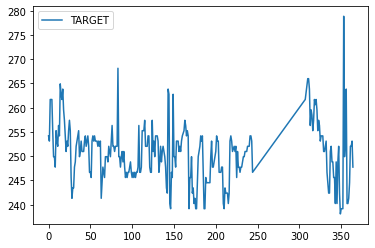

In [27]:
#Try modify and run this cell to get plot you want~

plt.figure(figsize = [15,8])
#df.hist(column = 'TARGET', bins = 20)
#df.boxplot(column = 'TARGET')
#df.plot.scatter('PV1','TARGET')
df.plot.line(y = 'TARGET')

<hr>

## H. Modeling Concepts<span id='modelconcepts'></span>

In this training, we will only talk about linear regression because according to our experience, linear regression is enough to modeling process variables. Besides, nonlinear modeling is relatively hard to implement and maintain. In this part, three major algorithms of linear regression will be mnetioned. They are multi-linear regression, principal component regression and finally partial least square regression.

### Multi-Linear Regression
This is one of the most common algorithm for linear regression. The algorithm aims at finding minimum summation of squared residuals, and this is also called ordinary least square method. Firstly, you can imagine the results y are multiplication of two matrix X(independent variables) and B(coefficients). Then, apply linear algebra to solve for B. You may get this result.
<img src='images/MLR1.JPG'>

<img src='images/MLR2.JPG'>

### Principal Component Regression

Principal Component is a combination of principal component analysis and multi linear regression. First, we perform PCA to reduce dimension of our variable set and we can see the original data will be decomposed into loadings and scores. After PCA, we apply multi linear regression on the reduced set(that is, the scores matrix) and dependent variable.

<img src='images/PCR1.JPG'>

Source of PCA Plot above: *https://towardsdatascience.com/what-is-the-difference-between-pca-and-factor-analysis-5362ef6fa6f9*


### Partial Least Square Regression

Partial Least Square also utilizes both PCA and multi linear regression., but there is one critical difference on how the algorithm determines factors. For PCR, factors are determined by creating most variance, however <font style='color:red'>**in PLSR, factors are determined on maximizing relationship with dependent variable.**</font> You may check video below to see what this means.(00:20~02:10)

In PLSR, <font style='color:red'>**instead of solving least squares between x and y, we turn to solve least squares between T(X score) and U(Y Score).</font>** Afterwards, we revert the results to original scale and checks the contribution or property of each variable

<img src='images/PLSR1.JPG'>

### Comparison Between MLR, PCR and PLSR

The table below list some pros and cons between three linear regression algorithms listed above.

<img src='images/Compare.JPG'>

In [28]:
#Run this cell to play videos that shows the concept of PLSR
from IPython.display import HTML
HTML('<iframe width="420" height="315" src="https://www.youtube.com/embed/watch?v=Qt3Vv5KsnpA&list=PL4C8FE6F00CBBF34A&index=2&t=608s"></iframe>')

## I. Outliers Detection <span id='outliersdetection'></span>

As we've mentioned before, outliers removal could be a part of data cleaning, but that's not a must. You can always perform outlier removal provided that it is required. Below lists some timing and strategy for outliers removal.


1. **During data preprocessing:** When you "obersve" something abnormal, you may flag it as an outlier and remove it. Some common cases are extreme out of bound value or a shaking point in continuous data.

<br>

2. **During exploratory data analysis:** During EDA, you will perform visualization of data which is convenient for capturing outliers. For example, if you found a point that is totally out of trend between X and Y in a scatter plot or there are data points far far away from normal range in histogram.
<img src='images/scatter_outlier.JPG' align='left' width='300'> <img src='images/hist_outlier.JPG'>
<br>

3. **During modeling:** Sometimes something would not appear until modeling. Therefore, you may check the model while doing you first time modeling and check if there are point against the trend or poor being poorly described. However, it is not recommended that you pick out outliers just to make your model metrics better. 
<img src='images/poorlydescribed.JPG' width='400'>

<br>

<font style='color:red'>**Remember, removing outliers is to ensure those points would not severely interfere the behavior of generalized model, not to make the metrics(such as RMSE) better and better.**</font>


### Drop rows

If you want to drop certain rows during outlier detection(or any other steps, of course), you may use function below to achieve that. You can adjust the index within the list to designate rows to drop.

<br>

~~~~
df = df.drop([index1, index2])
~~~~

In [29]:
#Run this cell to perform outlier inspection using scatter plot
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook, push_notebook, reset_output
from bokeh.models import ColumnDataSource, HoverTool
reset_output()
output_notebook()

#Create data source for Bokeh
source = ColumnDataSource(df)

#Calculate mean and standard deviation of target variable
target_avg = df['TARGET'].mean()
target_std = df['TARGET'].std()

#Create figure object
p = figure(plot_width=1000, plot_height=400, tooltips = [("Index","@index"),("TARGET","@TARGET")], x_range = [0, 400], y_range = [200, 300])

#Add plot to figure object with 3 specific lines (indicating mean-3*std, mean and mean+3*std for target variable)
p.circle("index", 'TARGET', source = source, legend_label = "Target Data")
p.line([-10, 400],[target_avg + 3*target_std, target_avg + 3*target_std], color = 'red', legend_label = "Mean+-3*Std")
p.line([-10, 400],[target_avg - 3*target_std, target_avg - 3*target_std], color = 'red', legend_label = "Mean+-3*Std")
p.line([-10, 400],[target_avg, target_avg], color='green', legend_label = "Mean")
p.legend.location = "top_left"

#Show the results
show(p)


Loading BokehJS ...

In [30]:
#Run this cell to drop data point 353
df = df.drop([83,353])

## J. Modeling <span id='modeling'></span>

In this training, we will focus on PLSR for the following reasons
- **Relatively high variable to sample ratio**
- **High possibility that variables are mutually correlated**

But of course, you are welcome to try out other algorithms using Python libraries. Below is the brief step and code structure for using machine learning libraries in Python.

<font style='color:navy'>**1. Import required libraries**</font>

<br>

~~~~
Import library_name
From library.module import module
~~~~

<br>

<font style='color:navy'>**2. Perform train_test_split:**</font> <br>
You may already complete this step in previous section

<br>

~~~~
train_x_rs, test_x_rs, train_y_rs, test_y_rs = train_test_split(df.iloc[:,1:], df[['TARGET']], train_size = 0.7)
~~~~

<br>

<font style='color:navy'>**3. Create model instance**</font><br>
You may need to specify parameters of particular model instance
Take PLSRegression for example, you may need to specify number of components and if you wish to scale x and y

<br>

~~~~
model = PLSRegresion(n_components = 2, scale = True)
~~~~

<br>

<font style='color:navy'>**4. Fit the data**</font><br>
Fit the data with you x and y training set

<br>

~~~~
model.fit(train_x, train_y)
~~~~

<br>

<font style='color:navy'>**5. Predict using the model**</font><br>
Predict using the test set data and the model to see the performance

<br>

~~~~
model.predict(test_x)
~~~~

<br>

<font style='color:navy'>**6. Interpret and Evaluate the model**</font><br>
Evaluate the model performance using prediction results. Commonly used metrics are root mean squared error (RMSE) and R2 score. You can either import relevant modules from Sci-Kit Learn or write the function by yourself.

*Note: Mean_squared_error module gives MSE instead of RMSE, if you would like to use RMSE you have to take the square root of MSE.*

<br>

~~~~
from sklearn.metrics import mean_squared_error, r2_score

RMSE =  np.sqrt(mean_squared_error(y_actual, y_prediction))
R2 = r2_score(y_actual, y_prediction)
~~~~

<br>



In [31]:
#Run this cell to import PLSRegression module and perform PLSR fitting on original dataset
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import explained_variance_score
pls_model0 = PLSRegression(n_components = 8, scale = True, max_iter = 500)
pls_model0.fit(df.iloc[:, 1:], df.iloc[:, 0])

PLSRegression(n_components=8)

In [32]:
#Run this cell to see the relationship of explained variance and number of factors used, we will try to find a good
#number of factors for later sample selection.

#Initiate explained variance list
explained_variance = []

#Iterate through different number of components
for i in range(1, pls_model0.n_components + 1):
    
    #Calculate coefficient on specific number of components
    coef = np.dot(pls_model0.x_rotations_[:,:i], np.transpose(pls_model0.y_loadings_[0][:i]))*pls_model0.y_std_
    
    #Rescale X and make prediction
    scale_X = (df.iloc[:, 1:] - df.iloc[:, 1:].mean())/df.iloc[:, 1:].std()
    pred = np.dot(scale_X, coef) + float(df['TARGET'].mean())
    
    #Append results to explained variance table
    explained_variance.append(explained_variance_score(df['TARGET'], pred))

#Create source for Bokeh plotting
pls_ev_source = ColumnDataSource({"Factor": ["Factor_" + str(x) for x in range(1, pls_model0.n_components + 1)], 
                                  "Explained_Variance": explained_variance})
                          
#Create figure object
pls_ev_fig1 = figure(plot_width = 600,
                     plot_height = 400, 
                     tooltips = [("Factor", "@Factor"), ("Explained_Variance", "@Explained_Variance")], 
                     x_range = ["Factor_" + str(x) for x in range(1, pls_model0.n_components + 1)], 
                     y_range = ([0, 1]),
                     x_axis_label = "Number of Components",
                     y_axis_label = "Explained Variance",
                     title = "Explained Variance V.S Number of Components")

#Add plot to figure object 
pls_ev_fig1.line("Factor", "Explained_Variance", source = pls_ev_source, color = 'blue')


#Show the results
show(pls_ev_fig1)

## K. Sample Selection <span id='sampleselection'></span>

### Train Test Split

There is still one more important thing to note is sample selection and splitting. When we are trying to make a predictive model on some data, typically we won't pour all of them into model training. According to data science or machine learning guidelines, we will first split data into training and testing set. Furthermore, training set will be split into training and validation set that could be used to test the rigidity of modeling during training process.

- **Training Set**: <br>
Used for building the model, the model learns from these data.

<br>

- **Validation Set**:<br>
Valiation set comes from part of the original training set and it is used to check the capability of the fresh trained model to deal with unfamiliar data. There are a lot of cross validation strategy. You may check <a href='https://en.wikipedia.org/wiki/Cross-validation_(statistics)'>here</a> if interested.

<br>

- **Test Set**:<br>
Test set is the data used to check how good the final model can handle totally unseen data. This step is crucial for the modeling process. If you keep concentrating on training metrics and forget to consider test set metrics, you will easily be falling into **Overfitting**.
<img src='images/train_test_split.jpg' width='500'>


Now we are going to talk about how to split these data. Below I will introduce two method. One is random samplin, and the other is Kennard-Stone sampling.

### Random Sampling
Same as how it is called, random selection selects samples in a random manner. This strategy is good enough but not optimized for some cases. In some conditions when we do only have limited samples, it becomes crucial to select uniformly distributed samples otherwise some extreme values either taken or untaken will have dramatic effect on model performance. Thus, we will introduce you Kennard-Stone algorithm in next part. You can use train_test_split function from Sci-Kit Learn library to perform random sampling.

You may adjust train_size to change size of training set

<br>

~~~~
train_x, test_x, train_y, test_y = train_test_split(df[['X']], df[['Y']], train_size = 0.7)
~~~~

<br>

### Kennard-Stone Sampling
Kennard-Stone algorithm was published by R.W. Kennard and L.A. Stone in 1969. KS algorithm aims at selecting samples uniformly within the variable space, thus decreasing the affect of extreme values on both training and testing.

<img src='images/KS.png' width='600'>

source: *https://hxhc.github.io/post/kennardstone-spxy/#ks-split*

<br>

**One drawback of using KS algorithm is that if you provide the same dataset, it will always give same split result due to the calculation within algorithm. On the contrary, random splits is more dynamic. In the next part, we will use a hybrid data selection that firstly applies KS to extract few data from the data space and then performs random split to the rest data.**

In [33]:
#Run this cell to perform Kennard-Stone sampling to extract 20% sample uniformly from projected score space
#From the explained variance plot above, we found that explained variance becomes stable at 6 components, thus we use this 
#number of components to evaluate in KS algorithm
from sklearn.model_selection import train_test_split
from KS_algorithm import *

#Create score table and perform KS split on score table
score_table = pd.DataFrame(index = df.index, data = pls_model0.x_scores_[:, :7])
train_x_ks, test_x_ks, train_y_ks, test_y_ks = KS_algorithm(score_table, df[['TARGET']], train_size = 0.2, return_dataset = True)
train_x_ks = df.loc[list(train_x_ks.index), :].iloc[:, 1:]
test_x_ks = df.loc[list(test_x_ks.index), :].iloc[:, 1:]

#Then, we extract 70 percent of data from the remaining dataset using random split
modified_df = df.loc[[x for x in df.index if x not in train_x_ks.index], :]
train_x_rs, test_x_rs, train_y_rs, test_y_rs = train_test_split(modified_df.iloc[:,1:], modified_df[['TARGET']], train_size = 0.7, random_state = 10)

#Finally, we combine the results from KS and random split tegether to get our final split of original data
train_x = pd.concat([train_x_ks, train_x_rs], axis = 0)
test_x = test_x_rs
train_y = pd.concat([train_y_ks, train_y_rs], axis = 0)
test_y = test_y_rs

Building distance matrix
Picking two furthest away samples


In [34]:
#Run this cell to import PLSRegression module and perform PLSR fitting on training data
from sklearn.cross_decomposition import PLSRegression
pls_model1 = PLSRegression(n_components = 7, scale = True, max_iter = 500)
pls_model1.fit(train_x, train_y)

#Predict using the model
model_train_table = pd.DataFrame(index = train_x.index)
model_train_table['Actual_Train'] = train_y
model_train_table['Predict_Train'] = pls_model1.predict(train_x)
model_test_table = pd.DataFrame(index = test_x.index)
model_test_table['Actual_Test'] = test_y
model_test_table['Predict_Test'] = pls_model1.predict(test_x)
#For the last step interpret and evaluate the model, we still talk about that in section L


## L. Interpret Model <span id='interpretmodel'></span>

PLSR models can provide us a lot of information. In this section, we are going to explore some of the most important information revealed by PLSR models.

### Sample Related
- **Scores:** <br>
Scores represents the data after transformation (project to factor), you can call model attribute (model.x_scores_) to get scores data. The dimension of scores attribute is **(num_of_samples X number of factors)** for X and **(num_of_samples X one)** for Y.

<br>

~~~~
X_Score = model.x_scores_
~~~~

<br>



- **T-U Score Plot:**<br>
T-U score plot is an extremely useful tool in PLSR model because this is exactly what PLSR used to do the linear modeling. PLSR captured the linear relationship based on transformed X and Y, that is, T and U. To make a T-U score plot, you have to choose a factor first. Because factor one has most information and most of the time the most important factor, we will usually plot T-U score along factor 1. Of course, you can also make plot on other factor if you would like to. Besides the plot, you can also analyze the correlation coefficient between x and y scores.<br><br>After deciding which factor to plot, you have to extract score of T and U of that factor from model attributes **(model.x_scores_ and model.y_scores_)**. 

In [35]:
#Run this cell to create score table and T-U score plot along the first two components
from scipy.stats import pearsonr
X_Score_Table = pd.DataFrame(index = train_x.index)
Y_Score_Table = pd.DataFrame(index = train_y.index)

#Iterate through different component to get score of that component
for comp_num in range(pls_model1.n_components):
    X_Score_Table['Factor_' + str(comp_num+1)] = pls_model1.x_scores_[:, comp_num]
    Y_Score_Table['Factor_' + str(comp_num+1)] = pls_model1.y_scores_[:, comp_num]

#Create ColumnDataSource
tu_score_source1 = ColumnDataSource({'index': X_Score_Table.index, 'T-Score': X_Score_Table['Factor_1'], 'U-Score': Y_Score_Table['Factor_1']})
    
#Create figure object
tu_score_fig = figure(plot_width = 600, 
                      plot_height = 400, 
                      x_range = ([-5, 7]), 
                      y_range = ([-10, 12]), 
                      tooltips = [("Index", "@index")],
                      x_axis_label = "T-Score(factor1)",
                      y_axis_label = "U-Score(factor1)")

#Add plot to figure object 
tu_score_fig.circle('T-Score', 'U-Score', source = tu_score_source1)

#Show T-U Score Plot
show(tu_score_fig)

#Show correlation coefficient
print("The Pearson correlation cofficient of Factor 1 is {}".format(pearsonr(X_Score_Table['Factor_1'], Y_Score_Table['Factor_1'])[0]))

The Pearson correlation cofficient of Factor 1 is 0.5001965259353803


- **Prediction Versus Reference Plot:**<br>
Prediction versus reference plot shows how well the data fits the actual value. You can simultaneously plot training and test set together to see more clearly the difference between them. Usually, people will calculate R square of this fitting line to analyze the prediction performance numerically. We will talk about this in later section.

In [36]:
#Run this cell to get prediction vs reference plot of our first model
from sklearn.metrics import mean_squared_error,r2_score

#Create prediction result table using training and test data
model_ref_train_1 = ColumnDataSource({'Predict_Train': model_train_table['Predict_Train'], 
                                         'Actual_Train': train_y['TARGET'],
                                         'index': train_y.index})

model_ref_test_1 = ColumnDataSource({'Predict_Test': model_test_table['Predict_Test'], 
                                   'Actual_Test': test_y['TARGET'],
                                    'index': test_y.index})

#Create figure object
pred_fig1 = figure(plot_width = 600,
                   plot_height = 400, 
                   tooltips = [("index", "@index"),("Actual_Test", "@Actual_Test"), ("Actual_Train", "@Actual_Train"), ("Predict_Train", "@Predict_Train"),("Predict_Test", "@Predict_Test")], 
                   x_range = ([230, 270]), 
                   y_range = ([230, 270]),
                   x_axis_label = "Actual Value",
                   y_axis_label = "Prediction Value",
                   title = "Prediction V.S Reference Plot")

#Add plot to figure object 
pred_fig1.circle("Actual_Train", 'Predict_Train', source = model_ref_train_1, legend_label = 'Training Data', color = 'green')
pred_fig1.circle("Actual_Test", 'Predict_Test', source = model_ref_test_1, legend_label = 'Test Data', color = 'blue')
pred_fig1.line([230, 270],[230, 270], color = 'red', legend_label = 'Ideal Fitting Line')
pred_fig1.legend.location = "top_left"


#Show the results
show(pred_fig1)


- **Prediction Line Plot:**<br>
Prediction line plot is another interpretation of predict versus reference plot. The difference is that prediction line plot is done in a index serial manner, better for users to see if prediction is moving toward the right direction.

In [37]:
#Run this cell to get prediction line plot of our first model
model_train_table = model_train_table.sort_index()
model_line_train_1 = ColumnDataSource({'Predict_Train': model_train_table['Predict_Train'], 
                                         'Actual_Train': model_train_table['Actual_Train'],
                                         'index': model_train_table.index})

#Create figure object
pred_fig_ind1 = figure(plot_width = 600,
                   plot_height = 400, 
                   tooltips = [("Actual_Train", "@Actual_Train"), ("Predict_Train", "@Predict_Train")], 
                   x_range = ([0, 250]), 
                   y_range = ([200, 300]),
                   x_axis_label = "Index",
                   y_axis_label = "Value",
                   title = "Prediction VS Actual Compare Plot")

#Add plot to figure object 
pred_fig_ind1.line("index", 'Predict_Train', source = model_line_train_1, legend_label = 'Prediction', color = 'blue')
pred_fig_ind1.line("index", 'Actual_Train', source = model_line_train_1, legend_label = 'Actual Value', color = 'red')
pred_fig_ind1.legend.location = "top_left"


#Show the results
show(pred_fig_ind1)

### Variable Related
- **Loadings:**<br>
Loadings contain the information of how original data is reduced to a lower dimension. Through loadings plot, we can analyze the contribution of each variable to certain factor. We may consider a variable not so useful if it has loading close to zero at first few factors. The closer the two variables, the more correlated they are. Sign of the loading at specific factor also implies the relative relationship, if two variables have same sign at certain factor, they have positive relation on that factor. The dimension of loadings is **(num_variables X num_factors)** for X and **(1 X num_factors)** for Y.

<br>

- **Loadings Plot:** <br>
Below is the loading plot of our first model at the first two factors. 

In [38]:
#Run this cell to create Loading table and plot Loading plot along the first two components
Loading_X = pd.DataFrame(pls_model1.x_loadings_, 
                             columns = ['Factor_' + str(x) for x in range(1, pls_model1.n_components + 1)],
                             index = train_x.columns)
Loading_Y = pd.DataFrame(pls_model1.y_loadings_, 
                         columns = ['Factor_' + str(x) for x in range(1, pls_model1.n_components + 1)],
                         index = train_y.columns)

#Create ColumnDataSource
loading_sourceX1 = ColumnDataSource(Loading_X)
loading_sourceY1 = ColumnDataSource(Loading_Y)

#Create figure object
loading_fig1 = figure(plot_width = 600, 
                      plot_height = 400, 
                      x_range = ([-1, 1]), 
                      y_range = ([-1, 1]), 
                      tooltips = [("Index", "@index"), ("Factor_1", "@Factor_1"), ("Factor_2", "@Factor_2")],
                      x_axis_label = "Loadings Factor_1",
                      y_axis_label = "Loadings Factor_2")

#Add plot to figure object 
loading_fig1.circle('Factor_1', 'Factor_2', source = loading_sourceX1, color = 'blue', legend_label = 'PV')
loading_fig1.circle('Factor_1', 'Factor_2', source = loading_sourceY1, color = 'red', legend_label = 'TARGET')
loading_fig1.line([2, -2], [0, 0])
loading_fig1.line([0, 0], [2, -2])

#Show T-U Score Plot
show(loading_fig1)

- **Weights:**<br>
Weights can be used to analyze relationship between X and Y. The way to read weight plot is quite similar to laodings plot. The sign indicates positive and negative relationship. The closer to the target variable the more positively correlated to it.

<br>

- **Weight Plot**<br>
Below is the weight plot of our original model at the first two factors.

In [39]:
#Run this cell to create Weight table and plot Weight plot along the first two components
Weight_X = pd.DataFrame(pls_model1.x_weights_, 
                             columns = ['Factor_' + str(x) for x in range(1, pls_model1.n_components + 1)],
                             index = train_x.columns)
Weight_Y = pd.DataFrame(pls_model1.y_weights_, 
                         columns = ['Factor_' + str(x) for x in range(1, pls_model1.n_components + 1)],
                         index = train_y.columns)

#Create ColumnDataSource
Weight_sourceX1 = ColumnDataSource(Weight_X)
Weight_sourceY1 = ColumnDataSource(Weight_Y)

#Create figure object
Weight_fig1 = figure(plot_width = 600, 
                      plot_height = 400, 
                      x_range = ([-1, 1]), 
                      y_range = ([-1, 1]), 
                      tooltips = [("Index", "@index"), ("Factor_1", "@Factor_1"), ("Factor_2", "@Factor_2")],
                      x_axis_label = "Weights Factor_1",
                      y_axis_label = "Weights Factor_2")

#Add plot to figure object 
Weight_fig1.circle('Factor_1', 'Factor_2', source = Weight_sourceX1, color = 'blue', legend_label = 'PV')
Weight_fig1.circle('Factor_1', 'Factor_2', source = Weight_sourceY1, color = 'red', legend_label = 'TARGET')
Weight_fig1.line([2, -2], [0, 0])
Weight_fig1.line([0, 0], [2, -2])

#Show T-U Score Plot
show(Weight_fig1)

- **Coefficient Plot** <br>
Coefficient plot shows the coefficient of each variable, thus you can roughly judge the importance of variable by the absolute value of coefficient. Furthermore, if you conduct cross-validation or other remodeling technique, you can also observe the variation of coefficient among different sub-models. If the coefficient is not stable, or even goes through positive and negative range, we may consider this an ideal variable to include in our model.

In [40]:
#Run this cell to get coefficient plot for PLS
coef_table_1 = pd.DataFrame({'Variable': train_x.columns, 'Coefficient': list(pls_model1.coef_)})
coef_source1 = ColumnDataSource({'Variable': train_x.columns, 
                                        'Coefficient': list(pls_model1.coef_)})
#Create figure object
coef_fig1 = figure(plot_width = 600,
                   plot_height = 400, 
                   tooltips = [("Variable", "@Variable"), ("Coefficient", "@Coefficient")], 
                   x_range = list(train_x.columns),
                   x_axis_label = "Variable",
                   y_axis_label = "Coefficient",
                   title = "Coefficient Plot")

#Add plot to figure object 
coef_fig1.vbar(x = 'Variable', top = 'Coefficient', source = coef_source1, color = 'blue', line_color = 'black')


#Show the results
show(coef_fig1)

- **Explained Variance** <br>
Explained variance is shows how much variance can be explained by the prediction. Most of all time, the R square value  will be same or at least very close to explained variance(explained variance takes mean of error into account while R squared does not). We can use variation in explained variance plot when using different number of factors to judge if our models are stable and if we can further reduce the number of component.

In [41]:
#Run this cell to plot explained variance plot
from sklearn.metrics import explained_variance_score
r2s = {'num_components':[], 'r2_train':[]}

#Iterate through different number of components to calculate explained variance
for i in range(1, pls_model1.n_components + 1):
    coef_i = np.dot(pls_model1.x_rotations_[:,:i], np.transpose(pls_model1.y_loadings_[0][:i]))*pls_model1.y_std_
    scale_Xi_train = (train_x-pls_model1.x_mean_)/pls_model1.x_std_
    x_pred_train = np.dot(scale_Xi_train, coef_i) + float(pls_model1.y_mean_)
    r2s['num_components'].append(i)
    r2s['r2_train'].append(explained_variance_score(train_y, x_pred_train))

#Create table and plotting source for the explained variance result
explained_variance_table = pd.DataFrame(r2s)
explained_variance_source = ColumnDataSource(explained_variance_table)

#Create figure object
explained_variance_fig1 = figure(plot_width = 600,
                                 plot_height = 400, 
                                 tooltips = [("num_components", "@num_components"),("r2_train", "@r2_train")], 
                                 x_range = ([0, 8]), 
                                 y_range = ([0.2, 0.7]),
                                 x_axis_label = "Number of Components",
                                 y_axis_label = "Explained Variance",
                                 title = "Explained Variance V.S Number of Components")

#Add plot to figure object 
explained_variance_fig1.line("num_components", 'r2_train', source = explained_variance_source, legend_label = 'Training Data', color = 'blue')
explained_variance_fig1.legend.location = "top_left"


#Show the results
show(explained_variance_fig1)

### Evaluate the model numerically

Below  we will discuss about several common method for analyzing a regression model numerically. One is root mean squared error (RMSE) and the other is R square (coefficient of determination).

- **Root Mean Square Error:**<br>
RMSE measure the average deviation of prediction against actual value. It guarantees positive value by square up the error. Roughly , this is one of the best choice to judge the performance of a model in a straightforward way. However, you should be careful of the scale.
<br>

<img src='images/RMSE.png'>


Source: *https://www.kaggle.com/c/gcase-kaggle-spring-2021/overview/evaluation*
<br>

- **R square:**<br>
R square is a measure of how much variance can be explained by the prediction model. The formula is shown below. The numerator part of the last term is standard square error of residual and the denominator part is total standard square error. The max value of R2 square is 1, indicating models explaining the data very well. However, in some worse cases, R square can even be negative.  
<br>

<img src='images/R2.png'>

Source: *https://ashutoshtripathi.com/2019/01/22/what-is-the-coefficient-of-determination-r-square/*
<br>

In [42]:
#Run this cell to print metrics results
print("The RMSE of the training data is {}".format(np.sqrt(mean_squared_error(train_y['TARGET'], pls_model1.predict(train_x)))))
print("The R2 Score of the training data is {}".format(r2_score(train_y['TARGET'], pls_model1.predict(train_x))))

The RMSE of the training data is 3.8595181003662438
The R2 Score of the training data is 0.5430394169983956


## M. Refine the Model <span id='refine'></span>

After getting our first PLSR model, it's time for us to refine the model till we are satisfied with performance or model complexity. Here are some strategy you may apply when refining the model.

1. **Remove Outliers Using Different Method:** <br>
Prior to modeling, you may already remove some outliers with data inspection and visualization. However, some outliers will not be sp obvious during early stage. Herein, we will take PLSR model for example to illustrate how we can find outliers after we perform the modeling.

<br>

2. **Paramter Tuning:**<br>
In most models, there are several parameters you can tune to adjust your model from different aspect. For example, you can adjust number of component and max numbers of iteration for PLSR model. For more details, please check the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html'>official document</a>.

<br>

3. **Cross-Validation**<br>
The original model does not provide cross-validation, however we can still utilize cross-validation by importing cross_validate module. Cross validation is used to test stability of a model before we proceed to test set evaluation. The algorithm will split dataset (normally training set) into training and validation set, and then build sub-models using training while testing them with validation set(now validation set plays the role of test set in every split). We can then plot the result with each set and compare both between splits and with original model performance. A stable model should perform similar in both original model and each validation split.<br>

   Below is an example of 5 fold cross validation. If you are interest in other cross validation techniques, you may check <a href='https://scikit-learn.org/stable/modules/cross_validation.html'>here</a>.

<br>

<img src='images/kfold_cv.JPG' width='500px'>

<br>

source: *https://scikit-learn.org/stable/modules/cross_validation.html*

In [43]:
#Run this cell to perfomr KFold cross validation and acquire explained variance information of each number of factors 
# and split.
from sklearn.model_selection import KFold

#Define number of splits
num_split = 10

#Create KFold object and initiate table and lists
cv_splits = KFold(n_splits = num_split, shuffle = True)
cv_explained_variance_table1 = pd.DataFrame({"Factors": ["Factor_" + str(x) for x in range(1, pls_model1.n_components + 1)]})
train_explained_variance = [0] * pls_model1.n_components
test_explained_variance = [0] * pls_model1.n_components

#Create coefficient table for CV
cv_coef_table1 = pd.DataFrame(index = ["PV" + str(x) for x in range(1, train_x.shape[1] + 1)])
cv_coef_table1.loc[:, "Original"] = pls_model1.coef_

#Initiate cross validation index
cv_ind = 1

#Iterate through all splits
for train_ind, test_ind in cv_splits.split(train_x):
    #Create submodel to predict submodel defined by KFold
    sub_trainX = train_x.iloc[train_ind, :]
    sub_trainY = train_y.iloc[train_ind, :]
    sub_testX = train_x.iloc[test_ind, :]
    sub_testY = train_y.iloc[test_ind, :]
    sub_model = PLSRegression(n_components = pls_model1.n_components)
    sub_model.fit(sub_trainX, sub_trainY)
    cv_coef_table1.loc[:, 'CV_' + str(cv_ind)] = sub_model.coef_
    
    #Iterate through different number of components to analyze explained variance on submodels
    for j in range(1, sub_model.n_components + 1):
        coef = np.dot(sub_model.x_rotations_[:,:j], np.transpose(sub_model.y_loadings_[:,:j]))*sub_model.y_std_
        scale_subtrainX = (sub_trainX-sub_model.x_mean_)/sub_model.x_std_
        scale_subtestX = (sub_testX-sub_model.x_mean_)/sub_model.x_std_
        pred_subtrain = np.dot(scale_subtrainX, coef) + float(sub_model.y_mean_)
        pred_subtest = np.dot(scale_subtestX, coef) + float(sub_model.y_mean_)        
        train_explained_variance[j-1] += explained_variance_score(sub_trainY, pred_subtrain)
        test_explained_variance[j-1] += explained_variance_score(sub_testY, pred_subtest)

    #Update cross validation index    
    cv_ind += 1
2
#Update results in explained variance table    
cv_explained_variance_table1['CV_Explained_Variance_Train'] = [x/cv_splits.n_splits for x in train_explained_variance] 
cv_explained_variance_table1['CV_Explained_Variance_Test'] = [x/cv_splits.n_splits for x in test_explained_variance]
cv_explained_variance_source1 = ColumnDataSource(cv_explained_variance_table1)

#Create plot object
cv_explained_variance_fig1 = figure(plot_width = 600,
                                 plot_height = 400, 
                                 tooltips = [("index", "@index"),("CV_Explained_Variance_Train", "@CV_Explained_Variance_Train"), ("CV_Explained_Variance_Test", "@CV_Explained_Variance_Test")], 
                                 x_range = (cv_explained_variance_table1['Factors']), 
                                 y_range = ([0, 0.9]),
                                 x_axis_label = "Number of Components",
                                 y_axis_label = "Explained Variance",
                                 title = "Explained Variance V.S Number of Components")

#Add plot to figure object 
cv_explained_variance_fig1.line("Factors", 'CV_Explained_Variance_Train', source = cv_explained_variance_source1, legend_label = 'Training Data', color = 'blue')
cv_explained_variance_fig1.line("Factors", 'CV_Explained_Variance_Test', source = cv_explained_variance_source1, legend_label = 'Test Data', color = 'red')
cv_explained_variance_fig1.legend.location = "top_left"


#Show the results
show(cv_explained_variance_fig1)

In [44]:
#Run this cell to create coefficient comparison on each cross-validation split
from bokeh.models import FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Accent, Category20

#Create coefficient table source for Bokeh plotting
cv_coef_source = ColumnDataSource(cv_coef_table1)

plot_tuple = [ (var, split) for var in cv_coef_table1.index for split in cv_coef_table1.columns]
#coefs = sum(zip(cv_coef_table1['Original'], cv_coef_table1['CV_1'], cv_coef_table1['CV_2'], cv_coef_table1['CV_3'], cv_coef_table1['CV_4'], cv_coef_table1['CV_5']), ())
coefs = cv_coef_table1.values
coefs = coefs.reshape(cv_coef_table1.shape[0]*cv_coef_table1.shape[1])
cv_coef_source = ColumnDataSource(data = dict(x = plot_tuple, counts = coefs))

#Create figure object
cv_coef_fig1 = figure(plot_width = 1000,
                   plot_height = 400, 
                   x_range = FactorRange(*plot_tuple),
                   tooltips = [("PV and CV", "@x"),("Coefficient", "@counts")],
                   x_axis_label = "Variable",
                   y_axis_label = "Coefficient",
                   title = "Coefficient Plot (Cross Validation)")

#Add plot to figure object 
cv_coef_fig1.vbar(x = 'x', top = 'counts', source = cv_coef_source, line_color = 'black',
                  fill_color = factor_cmap('x', palette = Category20[cv_coef_table1.shape[1]], factors = list(cv_coef_table1.columns), start = 1, end = 2))

cv_coef_fig1.xaxis.major_label_text_color = None



#Show the results
show(cv_coef_fig1)

## N. Modularize Your Code <span id='modularize'></span>

Sometimes (actually, most of the time...) you will need to modularize your code for the convenience in future use. In the examples above, all we use is line by line codes. Modularizing is the concept to put repetitive or complicated code inside a function or class so that you will have to call the function or class. Below list how to make a function in Python.

The function in Python follows the structure below :
- Start with def
- Define your function name
- Define parameters, or you can also leave it blank, indicating no parameters required
- Remember to add ":" at the end
- Write your statements
- Return results (return is optional, you can also choose not to return anything)

~~~~
def function_name(parameter1, parameter2):
    statement
    
    return results 
~~~~

Below is an example of creating a class, but this is far more advanced(but sometime more convenient). If you are really interested in understanding more about class, please check <a href='https://docs.python.org/3/tutorial/classes.html'>here</a>.

~~~~
class object:
    def __init__(self, necessary_params):
        self.param = necessary_params
    def func1():
        statement
        return results
~~~~

In [45]:
#I have created two class that includes pls_evaluator and result_plotter. To use the class, first import them 
#from a Python file. After that, all you have to do is to fill in the parameters according to class specification.

#Run this cell to import modules from modules.py
from modules import *

import importlib
import sys
importlib.reload(sys.modules['modules'])
from modules import *

In [46]:
#Run this cell to create two objects from imported class
pls_eva2 = pls_evaluator(n_component = 7, cv_fold = 10)
plotter2 = result_plotter()

## O. Iteratively Refine the Model <span id='iterativerefine'></span>

After preliminary investigation on out initial model, it's time for you to make judge on things to adjust. To refine the model, you should apply several strategies based on information given above. Such as:

- Remove outliers from your observation (But be cautious about overfitting)
- Remove features that is not representative or unstable
- Tune parameters such as number of component
- Make use of cross validation to help you determine if the model is stable

In [48]:
#Drop some poorly described samples
train_x2 = train_x.drop([213, 348, 143, 144, 139, 356])
train_y2 = train_y.drop([213, 348, 143, 144, 139, 356])

#Drop some variables
train_x2 = train_x2.loc[:, ['PV2', 'PV4', 'PV6', 'PV7', 'PV8', 'PV9', 'PV10', 'PV11', 'PV13', 'PV14', 'PV16']]
test_x2 = test_x.loc[:, ['PV2', 'PV4', 'PV6', 'PV7', 'PV8', 'PV9', 'PV10', 'PV11', 'PV13', 'PV14', 'PV16']]
test_y2 = test_y

#Train model with pls evaluator object on modified training data
pls_eva2_result = pls_eva2.fit(train_x2, train_y2)

#Create plotter object and perform all the plotting 
plotter2 = result_plotter()
plotter2.plot('explained_variance_plot', pls_eva2_result['explained_variance_table'])
plotter2.plot('tu_score_plot', pls_eva2_result['x_score_table'], pls_eva2_result['y_score_table'], factor1 = 1)
plotter2.plot('predict_reference_plot', pls_eva2_result['train_prediction_table'])
plotter2.plot('prediction_line_plot', pls_eva2_result['train_prediction_table'])
plotter2.plot('loadings_plot', pls_eva2_result['x_loading_table'], pls_eva2_result['y_loading_table'], factor1 = 1, factor2 = 2)
plotter2.plot('weights_plot', pls_eva2_result['x_weight_table'], pls_eva2_result['y_weight_table'], factor1 = 1, factor2 = 2)
plotter2.plot('coef_plot', pls_eva2_result['coef_table'])
plotter2.plot('cv_explained_variance_plot', pls_eva2_result['cv_explained_variance_table'])
plotter2.plot('cv_coef_plot', pls_eva2_result['cv_coef_table'])

The pearson correlation coefficient of TU at Factor_1 is 0.590535304770682


The R2 score of this prediction is 0.6671655896628355
The RMSE of this prediction is 3.1872308840092263


## P. Finalized the Model <span id='finalize'></span>

If you finished the refinement of model, you may use the test set to see if the performance meets our requirement. A commonly seen problem is overfitting. Overfitting occurrs when the performance in test set is apparently much worse than training set (provided training set gives decent performance at least). In order to avoid overfitting, there are some general guides for us to follow:

- **Do not focuss too much on reducing training error**
- **Reduce the complexity of model**
- **Monitor performance through cross-validation**


<img src='images/model_complexity.png' width='400'>

source: *https://vitalflux.com/overfitting-underfitting-concepts-interview-questions/*

In [49]:
#Run this cell to predict test data with final model
pred_test_table1 = pd.DataFrame(index = test_x.index,
                               data = {'Actual': test_y['TARGET'],
                                       'Prediction': pls_model1.predict(test_x).reshape([test_x.shape[0],])})

#Use plotter object to plot prediction test table
plotter2.plot('predict_reference_plot', pred_test_table1)

#Run this cell to predict test data with final model
pred_test_table2 = pd.DataFrame(index = test_x2.index,
                               data = {'Actual': test_y2['TARGET'],
                                       'Prediction': pls_eva2.original_model.predict(test_x2).reshape([test_x2.shape[0],])})

#Use plotter object to plot prediction test table
plotter2.plot('predict_reference_plot', pred_test_table2)



The R2 score of this prediction is 0.6413751640913918
The RMSE of this prediction is 3.116538963642341


The R2 score of this prediction is 0.6565945789615322
The RMSE of this prediction is 3.0496918067342835


In [50]:
#Run this cell to load function for getting coefficient in original scale
def get_final_result(model, training_set):
    """
    This function helps you obtain variable coefficient in original scale as well as intercept part
    of the final equation.
    
    Input:
        model: Model you wish to get coefficient
        training_set: Training_set used to train the model, in order to get variables name
    Output:
        final_coef_table: Table with coefficient in original scale
    """
    #Retrieve scaled coefficient from input model
    coef = np.dot(model.x_rotations_, np.transpose(model.y_loadings_)) * model.y_std_
    coef = coef.reshape([len(coef),])
    
    #Rescale the coefficient with standard deviation of variable
    true_coef = coef/model.x_std_
    
    #Calculate equation intercept
    intercept = -sum(true_coef * model.x_mean_) + model.y_mean_
    
    #Create final coefficient table in original scale
    final_coef_table = pd.DataFrame(index = training_set.columns, data = {'coef': true_coef})
    final_coef_table.loc['intercept','coef'] = intercept
    
    return final_coef_table

In [67]:
#Run this cell to get coefficient in original scale
final_equation = get_final_result(pls_eva2.original_model, train_x2)
final_equation

,coef
PV2,0.580162
PV4,-0.734379
PV6,0.256524
PV7,0.477711
PV8,-0.593013
PV9,0.549208
PV10,45.390711
PV11,-38.571220
PV13,-0.365591
PV14,-0.027735


In [64]:
%load_ext watermark

%watermark -v -m -p numpy,pandas,matplotlib,bokeh,IPython,scipy,sklearn,seaborn,watermark

%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.1
IPython version      : 7.22.0

numpy     : 1.21.0
pandas    : 1.3.0
matplotlib: 3.4.2
bokeh     : 2.3.3
IPython   : 7.22.0
scipy     : 1.7.0
sklearn   : 0.0
seaborn   : 0.11.1
watermark : 2.2.0

Compiler    : MSC v.1912 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit

Last updated: Mon Aug 02 2021 15:47:00Taipei Standard Time

